<a href="https://colab.research.google.com/github/mighty-mass/ai-engineer-course/blob/main/ML%20Module/RealEasteAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Il Dataset - Housing
Columns (or features)

*   **price**: il prezzo, il target da prevedere
*   **area**: superficie dell’immobile
*   **bedrooms**: numero di camere da letto
*   **bathrooms**: numero di bagni
*   **stories**: numero di piani
*   **mainroad**: vale 1 se l’immobile affaccia su una strada principale, 0 altrimenti
*   **guestroom**: vale 1 se l’immobile ha una stanza degli ospiti, 0 altrimenti
*   **basement**: vale 1 se l’immobile ha un seminterrato, 0 altrimenti
*   **hotwaterheating**: vale 1 se l’immobile ha una caldaia, 0 altrimenti
*   **airconditioning**: vale 1 se l’immobile ha l’aria condizionata, 0 altrimenti
*   **parking**: numero di parcheggi
*   **prefarea**: vale 1 se l’immobile è in una zona prestigiosa, 0 altrimenti
*   **furnishingstatus**: vale 0 se l’immobile non è arredato, 1 se è parzialmente arredato, 2 se è completamente arredato


#1 - Preprocessing
Transformations applied to the input CSV are not complicated, but for the sake of learning I tried to obtain the same dataset from Kaggle raw data.
The steps applied are two:
-  convert every "yes" and "no" into a boolean option (in byte language, 0s and 1s)
-  convert furnishing status into ordered label

In [ ]:

import pandas as pd
import numpy as np

# ProfessionAI file
filepath = "https://proai-datasets.s3.eu-west-3.amazonaws.com/housing.csv"
input_df = pd.read_csv(filepath)
input_df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


In [ ]:
import kagglehub
file_name = "yasserh/housing-prices-dataset"
# Download latest version
kaggle_path = kagglehub.dataset_download(file_name)

print("Path to dataset files:", kaggle_path)

# Kaggle file
kaggle_df = pd.read_csv(f"{kaggle_path}/Housing.csv")
kaggle_df.head(5)

Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/housing-prices-dataset/versions/1


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


After the first run and some trials, I've noticed that in your CSV, differntly from the description, you defined
**furnishingstatus** in a slightly different way: 1 is "furnished" and 2 is "semi-furnished". Since it a completely arbitrial decision, I will continue to use your input CSV keeping in mind that the number are different.

In [ ]:
main_df = input_df
# main_df = kaggle_df # uncomment to use Kaggle data instead

In [ ]:
# Convert 'yes' and 'no' to boolean (1 and 0)
for column in main_df.columns:
    if main_df[column].dtype == object and column != 'furnishingstatus':  # Check if the column is of object (string) type
        main_df[column] = main_df[column].map({'yes': 1, 'no': 0})

# Convert 'furnishingstatus' to ordered labels
unique_furnishing = sorted(main_df['furnishingstatus'].drop_duplicates(),reverse=True)

# the line above will ensure ['unfurnished', 'semi-furnished', 'furnished']
mapping_furnishing = {value: index for index, value in enumerate(unique_furnishing)}

# hence {'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2}
main_df['furnishingstatus'] = main_df['furnishingstatus'].map(mapping_furnishing)
main_df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


A small comparison to show the differences aobut the furnishingstatus values

In [ ]:
main_df.compare(input_df)

Empty DataFrame
Columns: []
Index: []

In [ ]:
missing_values = main_df.isnull().sum()
missing_values # No missing values

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
# Check min and max values for all discrete and continuos features
main_df[['price','area', 'bedrooms','bathrooms', 'stories']].agg(['min', 'max'])

,price,area,bedrooms,bathrooms,stories
min,1750000,1650,1,1,1
max,13300000,16200,6,4,4


Since all the variable are discrete or contiounuos but not in a defined range, I will apply the standardizatin to all of them (area, bedrooms, bathrooms, stories). Price shouldn't be standardized since is our target variable



In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score, cross_validate
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import json
RANDOM_SEED = 0


In [ ]:

columns_to_standardize = ['area', 'bedrooms', 'bathrooms', 'stories']
scaler = StandardScaler()
main_df[columns_to_standardize] = scaler.fit_transform(main_df[columns_to_standardize])

main_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,2,1,1
1,12250000,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,3,0,1
2,12250000,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,2,1,0
3,12215000,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,3,1,1
4,11410000,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,2,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(main_df.drop('price', axis=1), main_df['price'], test_size=0.2, random_state=RANDOM_SEED)
y_test_scaled = scaler.fit_transform(y_test.values.reshape(-1, 1))
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))

## Regression Models
- Ridge (L2 regulation)
- Lasso (L1 regulation)
- Elastic Net (L1+L2)

In [ ]:
# Define all models and configuration
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=1.0)
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.1) # Lowering the L1_ratio value means more L2 (Ridge-like)

In [ ]:
ridge_model.fit(X_train, y_train_scaled)
lasso_model.fit(X_train, y_train_scaled)
elastic_net_model.fit(X_train, y_train_scaled)

ElasticNet(l1_ratio=0.1)

In [ ]:
ridge_pred = ridge_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)
elastic_net_pred = elastic_net_model.predict(X_test)

In [ ]:
ridge_scores = cross_val_score(ridge_model, X_train, y_train_scaled, cv=5, scoring='r2')
lasso_scores = cross_val_score(lasso_model, X_train, y_train_scaled, cv=5, scoring='r2')
elastic_net_scores = cross_val_score(elastic_net_model, X_train, y_train_scaled, cv=5, scoring='r2')

print(f"Ridge Cross-Validation Scores: {ridge_scores}")
print(f"Lasso Cross-Validation Scores: {lasso_scores}")
print(f"Elastic Net Cross-Validation Scores: {elastic_net_scores}")

Ridge Cross-Validation Scores: [0.75654324 0.62226897 0.60604103 0.61913214 0.66931792]
Lasso Cross-Validation Scores: [-1.85427626e-05 -4.86569306e-05 -2.13014903e-06 -1.01341731e-03
 -1.82962554e-03]
Elastic Net Cross-Validation Scores: [0.47535282 0.36839889 0.43650076 0.37305321 0.46308075]


In [ ]:
ridge_results = cross_validate(ridge_model, X_train, y_train_scaled, cv=5, return_train_score=True)
lasso_results = cross_validate(lasso_model, X_train, y_train_scaled, cv=5, return_train_score=True)
elastic_net_results = cross_validate(elastic_net_model, X_train, y_train_scaled, cv=5, return_train_score=True)

print(f"Ridge Cross-Validation Scores: {ridge_results}")
print(f"Lasso Cross-Validation Scores: {lasso_results}")
print(f"Elastic Net Cross-Validation Scores: {elastic_net_results}")

Ridge Cross-Validation Scores: {'fit_time': array([0.00665355, 0.00250578, 0.00247812, 0.00249219, 0.00244594]), 'score_time': array([0.00209737, 0.00182033, 0.00172734, 0.00175786, 0.00269818]), 'test_score': array([0.75654324, 0.62226897, 0.60604103, 0.61913214, 0.66931792]), 'train_score': array([0.65210409, 0.69039481, 0.68854502, 0.69147847, 0.67764356])}
Lasso Cross-Validation Scores: {'fit_time': array([0.00266385, 0.00270915, 0.00259185, 0.00303936, 0.00262189]), 'score_time': array([0.00179601, 0.00188494, 0.00426507, 0.00194263, 0.00181961]), 'test_score': array([-1.85427626e-05, -4.86569306e-05, -2.13014903e-06, -1.01341731e-03,
       -1.82962554e-03]), 'train_score': array([0., 0., 0., 0., 0.])}
Elastic Net Cross-Validation Scores: {'fit_time': array([0.00268126, 0.00267649, 0.00312328, 0.00294852, 0.00262284]), 'score_time': array([0.00179958, 0.00181437, 0.00182629, 0.00187731, 0.00182438]), 'test_score': array([0.47535282, 0.36839889, 0.43650076, 0.37305321, 0.46308075]

Summarized results comparing the R^2 scores:
- Ridge performs consistently well with a balance between train and test scores, suggesting that it is the best performing model in this case
- Lasso is clearly over-regularized and not suitable for this dataset with the current parameter settings
- Elastic Net is performing better than Lasso but not as well as Ridge

In [ ]:
ridge_mse = mean_squared_error(y_test_scaled, ridge_pred)
lasso_mse = mean_squared_error(y_test_scaled, lasso_pred)
elastic_net_mse = mean_squared_error(y_test_scaled, elastic_net_pred)

print(f"Ridge MSE: {ridge_mse}")
print(f"Lasso MSE: {lasso_mse}")
print(f"Elastic Net MSE: {elastic_net_mse}")

Ridge MSE: 0.3214872962154519
Lasso MSE: 0.9999999999999999
Elastic Net MSE: 0.5296877571201322


In [ ]:
ridge_non_zero = np.sum(ridge_model.coef_ != 0)
lasso_non_zero = np.sum(lasso_model.coef_ != 0)
elastic_net_non_zero = np.sum(elastic_net_model.coef_ != 0)

In [ ]:
print(f"Ridge MSE: {ridge_mse}, Non-zero Coefficients: {ridge_non_zero}")
print(f"Lasso MSE: {lasso_mse}, Non-zero Coefficients: {lasso_non_zero}")
print(f"Elastic Net MSE: {elastic_net_mse}, Non-zero Coefficients: {elastic_net_non_zero}")

Ridge MSE: 0.3214872962154519, Non-zero Coefficients: 12
Lasso MSE: 0.9999999999999999, Non-zero Coefficients: 0
Elastic Net MSE: 0.5296877571201322, Non-zero Coefficients: 8


- Ridge: Retains all 12 features with non-zero coefficients, applying L2 regularization to shrink but not eliminate them. (Optimal result)
- Lasso: Sets all coefficients to zero, removing all features due to over-regularization. (Worst result)
- Elastic Net: Selects 8 features, balancing feature selection and regularization by combining L1 and L2 penalties. (Good result, but only with the lowest l1_ratio, otherwise suffer the same issues of Lasso)

In [ ]:
import seaborn as sns

sns.set_theme()
# sns.set_palette("pastel")

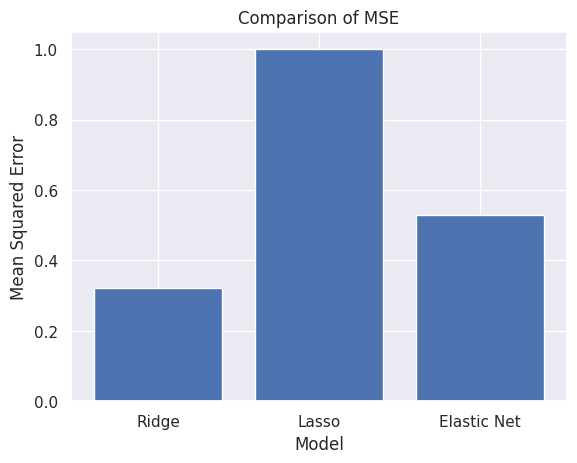

In [ ]:
import matplotlib.pyplot as plt

models = ['Ridge', 'Lasso', 'Elastic Net']
mses = [ridge_mse, lasso_mse, elastic_net_mse]

plt.bar(models, mses)
plt.title('Comparison of MSE')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.show()

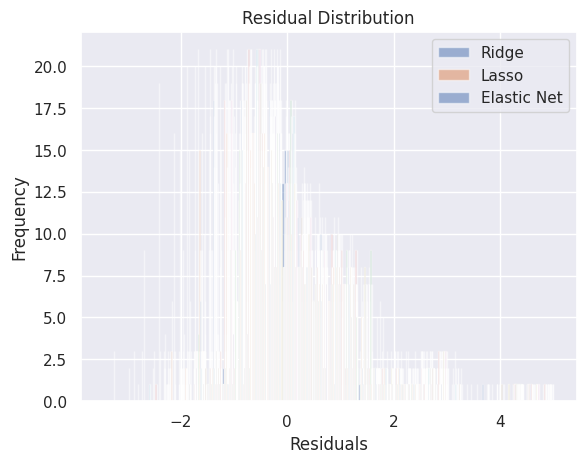

In [ ]:
residuals = {
    'Ridge': y_test_scaled - ridge_pred,
    'Lasso': y_test_scaled - lasso_pred,
    'Elastic Net': y_test_scaled - elastic_net_pred
}

for model, resid in residuals.items():
    plt.hist(resid, bins=30, alpha=0.5, label=model)

plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Some takeawyas:

- Ridge regression performs the best here, with the lowest MSE, and retains all of the features by shrinking their coefficients without setting them to zero
- Lasso regression sets all coefficients to zero, resulting in poor performance. This could mean that the Lasso's regularization strength is too high, causing excessive shrinking of coefficients
- Elastic Net performs better than Lasso but worse than Ridge. It selects only one non-zero coefficient. Since Elastic Net is a combination of Lasso and Ridge, it applies both L1 and L2 penalties

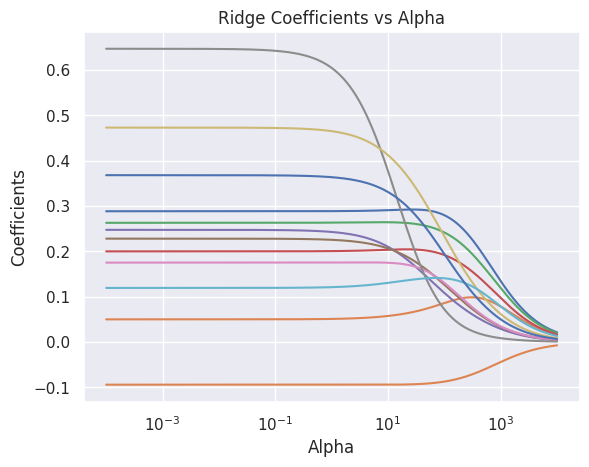

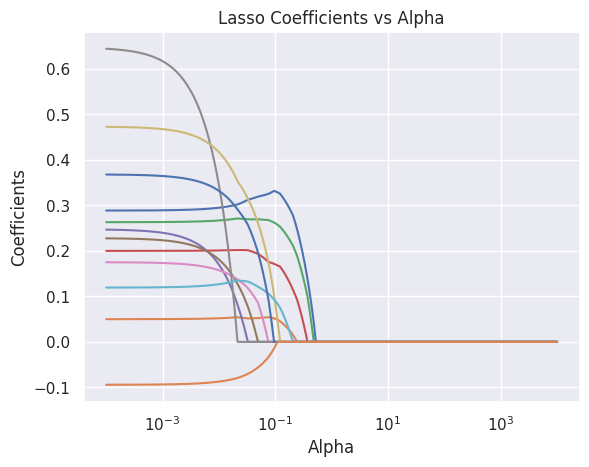

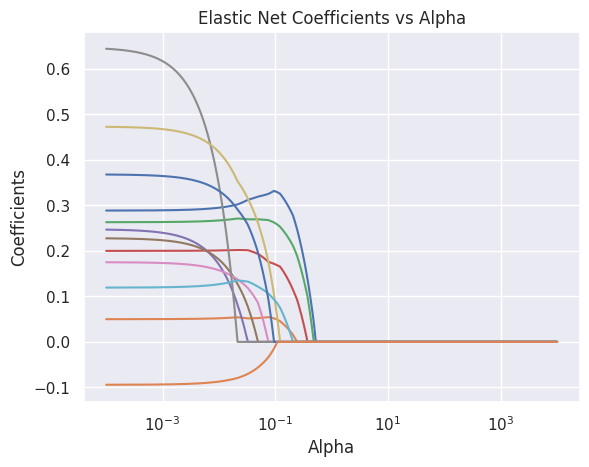

In [ ]:
alphas = np.logspace(-4, 4, 1000)
coef_ridge = []
coef_lasso = []
coef_elastic_net = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    lasso = Lasso(alpha=alpha)
    elastic_net = ElasticNet(alpha=alpha, l1_ratio=0.1)
    ridge.fit(X_train, y_train_scaled)
    lasso.fit(X_train, y_train_scaled)
    elastic_net.fit(X_train, y_train_scaled)
    coef_ridge.append(ridge.coef_.flatten())
    coef_lasso.append(lasso.coef_.flatten())
    coef_elastic_net.append(elastic_net.coef_.flatten())

plt.plot(alphas, coef_ridge)
plt.xscale('log')
plt.title('Ridge Coefficients vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.show()

plt.plot(alphas, coef_lasso)
plt.xscale('log')
plt.title('Lasso Coefficients vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.show()

plt.plot(alphas, coef_lasso)
plt.xscale('log')
plt.title('Elastic Net Coefficients vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.show()

The purpose of this grapth is to show the region where the coefficients are stable but not too close to zero, which indicates the optimal place for balancing model complexity and performance.
The strongest the alpha for the models, the quicker the coefficients goes to zero.

In our case, the best spot for Ridge seems around 10^1. For the others, alpha seems efficient around 10^-1